# Customer Churn Data Analysis

# Project Overview

What is Customer Churn?

Customer churn refers to the rate at which customers stop doing business with a company over a specific period. It is a key performance metric, especially in industries like telecommunications, retail, banking, and subscription services. Churn can either be voluntary (when customers choose to leave) or involuntary (due to factors like expired payment methods or account closures).

Why is Customer Churn Analysis Important?

Understanding and reducing churn is crucial because retaining existing customers is generally more cost-effective than acquiring new ones. High churn rates can lead to significant revenue losses, reduced market share, and increased customer acquisition costs.

Goals of the Project:

Identify key factors influencing customer churn: Analyze demographic, behavioral, and transactional data to determine what drives customers to leave.
Predict churn: Use predictive analytics to identify customers likely to churn, enabling targeted retention strategies.
Develop retention strategies: Provide actionable insights to improve customer experience and reduce churn rates.
Monitor churn trends: Understand how churn evolves over time and across customer segments.

How Churn Analysis Helps in the Industry:

Identify customers at risk of switching to competitors and offer personalized retention offers.
Predict and prevent account closures by improving service quality and engagement.
Analyze purchase patterns to retain high-value customers through loyalty programs.
Reduce subscription cancellations by enhancing user experience and delivering value-added services.
Improve patient retention by identifying gaps in service delivery or dissatisfaction.

Benefits of Churn Analysis:

Cost Savings: Reduce customer acquisition costs by focusing on retaining existing customers.
Improved Customer Lifetime Value (CLV): Increase the value of each customer relationship through longer engagement.
Enhanced Decision-Making: Data-driven insights enable companies to tailor marketing strategies and improve customer service.
Revenue Growth: By retaining more customers, companies can stabilize and grow their revenue streams.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:/Users/Hairav/Downloads/Customer Churn.csv")

# Data Exploration

In [4]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df["customerID"].duplicated().any()

False

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df.shape

(7043, 21)

Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [11]:
df[df["TotalCharges"]==" "]
# Now replace null value for the column totalcharges with 0

df["TotalCharges"].replace(" ",0,inplace=True)

In [12]:
df["TotalCharges"].dtype
# Now convert data type into float

dtype('O')

In [13]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [14]:
# Now checking again
df["TotalCharges"].dtype

dtype('float64')

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

Text(0.5, 1.0, 'Count of Customers by Churn')

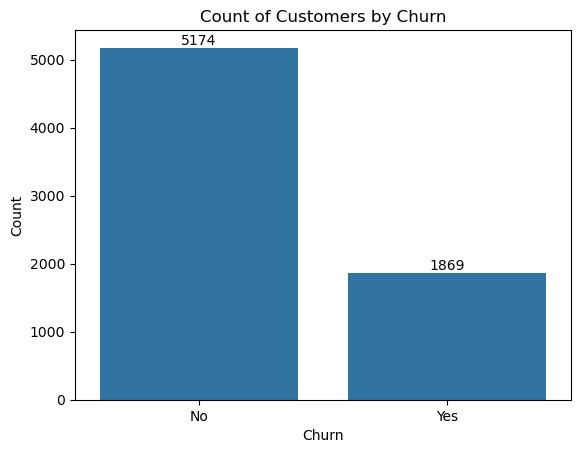

In [17]:
# Checking Churn Rate
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.ylabel("Count")
plt.title("Count of Customers by Churn")

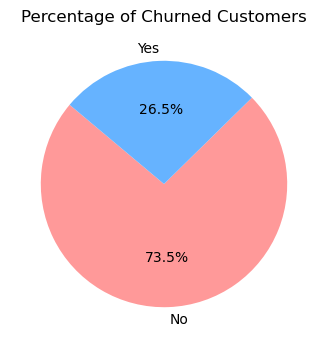

In [18]:
pie=df.groupby("Churn").agg({"Churn":"count"})
plt.figure(figsize=(5,4))
plt.pie(pie["Churn"], labels=pie.index, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff"])
plt.title("Percentage of Churned Customers")
plt.show()

# From the given pie chart we can conclude that around 27% of our customers have churned out.

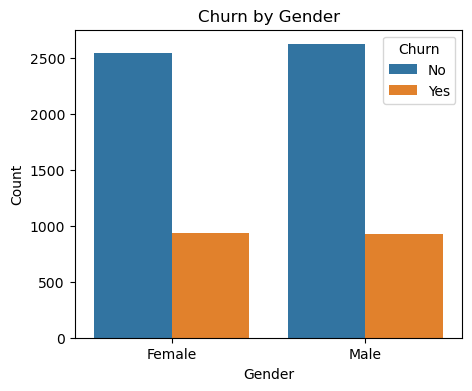

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn by Gender")
plt.show()

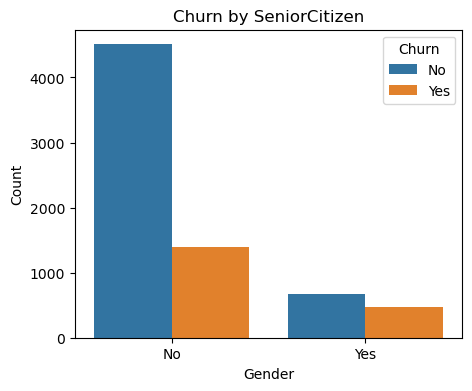

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(x="SeniorCitizen",data=df,hue="Churn")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn by SeniorCitizen")
plt.show()

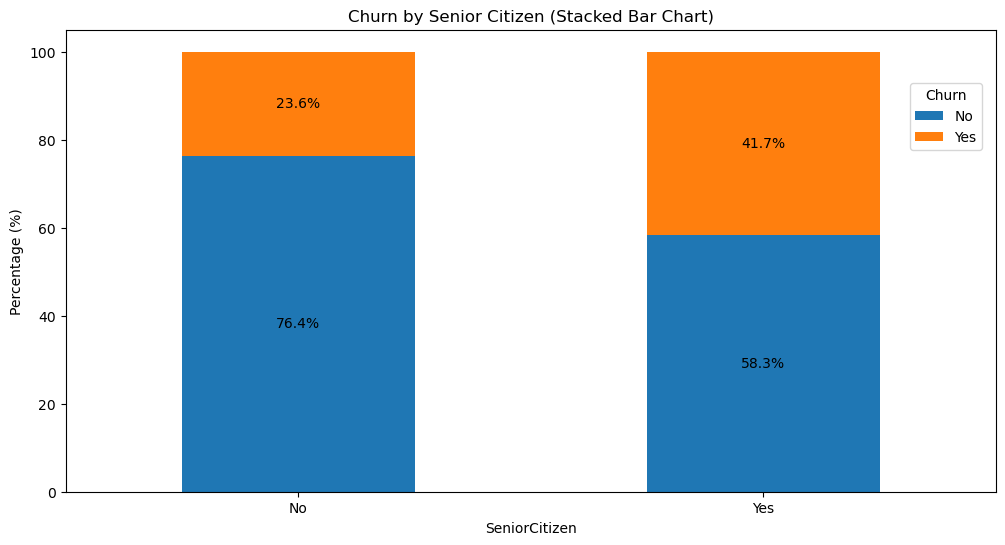

In [28]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100
# Plot
fig, ax = plt.subplots(figsize=(12,6))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

# Comparative a greater pecentage of people in senior citizen category have churned

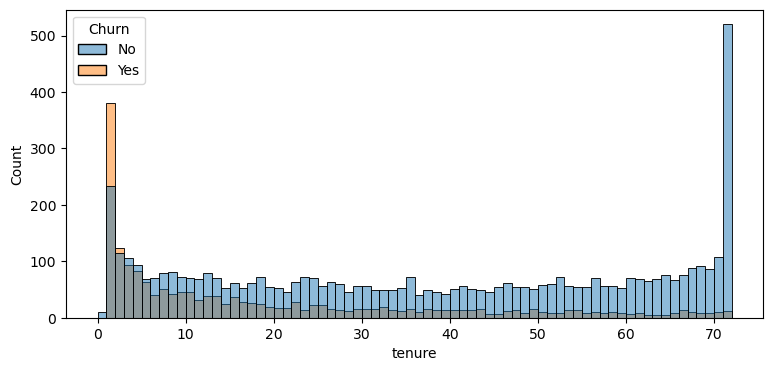

In [36]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

# People who have used our services for a long time have stayed and people who have used our sevices 1 or 2 months have churned

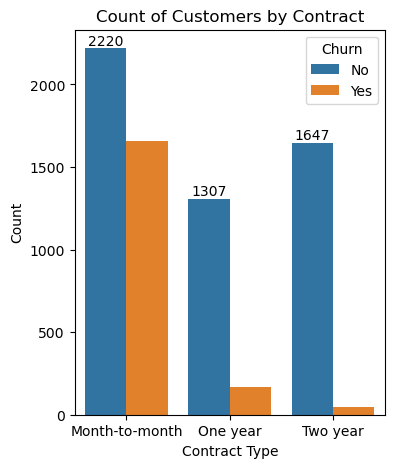

In [49]:
plt.figure(figsize=(4,5))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

# People who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

In [51]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

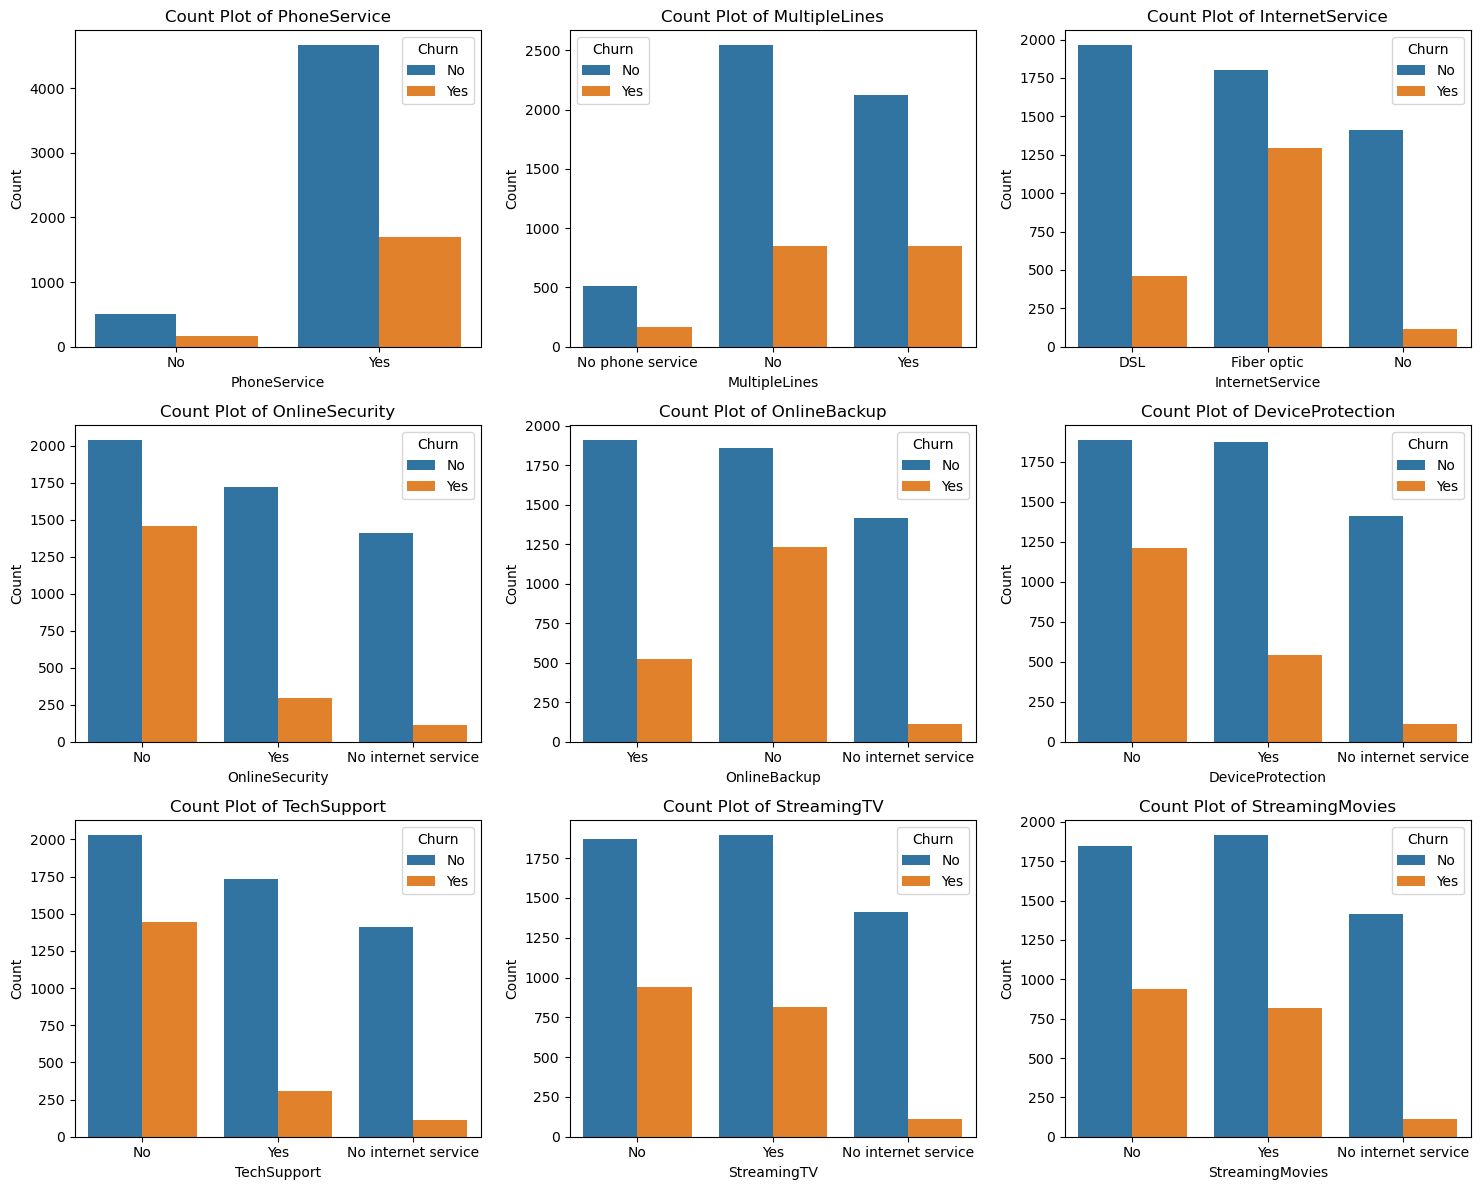

In [52]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

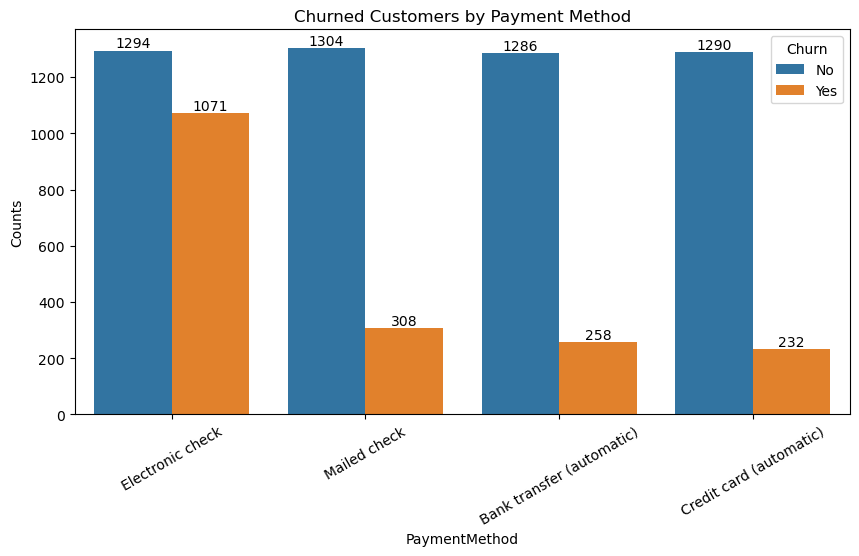

In [64]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.ylabel("Counts")
plt.xticks(rotation = 30)
plt.show()

# Customer is likely to churn when he is using electronic check as a payment method.

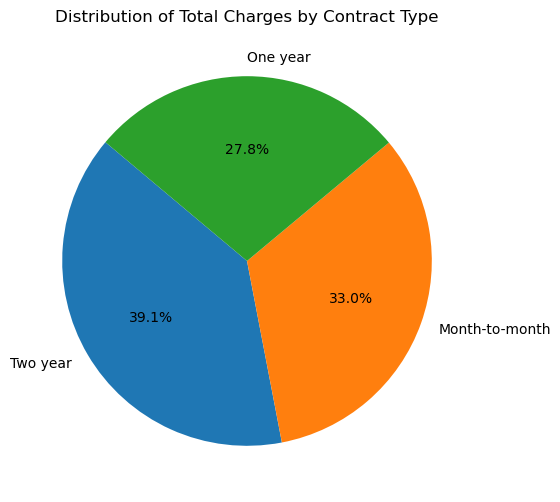

In [71]:
contract_amount=df.groupby("Contract")["TotalCharges"].sum().sort_values(ascending=False)
plt.figure(figsize=(6,6))
plt.pie(contract_amount, labels=contract_amount.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Total Charges by Contract Type')
plt.show()

# The pie chart shows the distribution of total charges by contract type, with "Two-year" contracts contributing the largest share at 39.1%, followed by "Month-to-month" at 33.0%, and "One-year" at 27.8%. This indicates that longer-term contracts account for a significant portion of the total charges.

In [ ]:
Visualizations & Data Insights:
 ● BarCharts and Line Graphs:
 ○ Thevisual representation of churn by payment method clearly shows that
 customers using electronic checks churn almost three times as much as those
 using more traditional or secure methods like credit cards.
 ○ Customertenure vs. churn rate visualizations reveal a clear declining trend in
 churn as customers' tenure increases, underscoring the need for early-stage
 customer loyalty programs.
 ● Percentage Distribution of Churn Across Factors:
 ○ PaymentMethods: 45% churn for electronic check users, 15% for credit card
 users.
○ Contract Types: 42% churn for month-to-month contracts, 11% for yearly
 contracts, 3% for two-year contracts.
 ○ Tenure: 50% churn in the first year, dropping to 15% after three years.
 Recommendations:
 ● PromoteLong-Term Contracts: Offer incentives for customers to commit to longer
 contracts to reduce churn.
 ● AddressPayment Method Concerns: Implement campaigns encouraging customers
 to switch from electronic checks to more reliable payment methods.
 ● CustomerEngagement in Early Tenure: Focus on improving the customer experience
 within the first year, as churn is highest in this period.
 ● Special Senior Citizen Retention Programs: Create personalized offers or assistance
 programs to retain the senior demographic